In [6]:
import pandas as pd
import numpy as np
import networkx as nx
from collections import defaultdict

def graphlet_degree_vector(df):
    G = nx.from_pandas_edgelist(df, source='Source', target='Target')
    n = len(G.nodes())
    gdv = defaultdict(int)
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        k = len(neighbors)
        if k > 1:
            subgraph = G.subgraph(neighbors)
            orbits = nx.algorithms.isomorphism.GraphMatcher(G, subgraph).subgraph_isomorphisms_iter()
            for orbit in orbits:
                orbit_nodes = set(orbit.keys())
                gdv[len(orbit_nodes)] += 1
    gdv = np.array([gdv[i] for i in range(1, n)])
    return gdv

# Example usage
df = pd.read_csv("CVC_Motif.csv")
gdv = graphlet_degree_vector(df)
print(f"The graphlet degree vector of the DataFrame is {gdv}")


The graphlet degree vector of the DataFrame is [  0  78 363 374 171 264  65   0  19   5   2   8   1   0   0   0   1   0
   0   0   0   0   0   0   0   0   0   0]


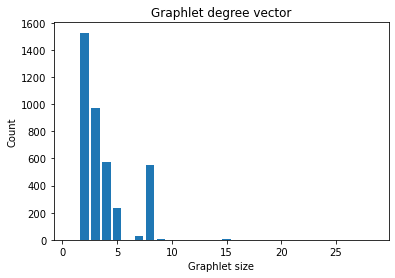

In [5]:
import matplotlib.pyplot as plt
import numpy as np

gdv = np.array([0, 1528, 976, 573, 238, 2, 31, 552, 4, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

plt.bar(range(1, len(gdv)+1), gdv)
plt.xlabel('Graphlet size')
plt.ylabel('Count')
plt.title('Graphlet degree vector')
plt.show()
